In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('/content/full_dataset_one_row_per_cycle_fw_indexing_48days.csv')

In [34]:
df.head()

,Unnamed: 0,hub_id,cycle_index,cycle_length,cycle_status,max_LH_day,max_LH_day_bw,day0_LH,day1_LH,day2_LH,...,day38_PDG,day39_PDG,day40_PDG,day41_PDG,day42_PDG,day43_PDG,day44_PDG,day45_PDG,day46_PDG,day47_PDG
0,0,U2CCD5D16315123,31.0,35,1,21.0,-14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,U303F6B17404145,7.0,19,1,5.0,-14.0,7.260,11.30,9.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,U2E649816722750,19.0,31,1,15.0,-16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,U2F50A717152551,10.0,26,1,20.0,-6.0,3.625,2.13,5.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,U2F191017106760,19.0,26,1,15.0,-11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
lh_columns = [col for col in df.columns if '_LH' in col]
e3g_columns = [col for col in df.columns if '_E3G' in col]
pdg_columns = [col for col in df.columns if '_PDG' in col]

In [36]:
lh_columns = lh_columns[2:]
lh_columns

['day0_LH',
 'day1_LH',
 'day2_LH',
 'day3_LH',
 'day4_LH',
 'day5_LH',
 'day6_LH',
 'day7_LH',
 'day8_LH',
 'day9_LH',
 'day10_LH',
 'day11_LH',
 'day12_LH',
 'day13_LH',
 'day14_LH',
 'day15_LH',
 'day16_LH',
 'day17_LH',
 'day18_LH',
 'day19_LH',
 'day20_LH',
 'day21_LH',
 'day22_LH',
 'day23_LH',
 'day24_LH',
 'day25_LH',
 'day26_LH',
 'day27_LH',
 'day28_LH',
 'day29_LH',
 'day30_LH',
 'day31_LH',
 'day32_LH',
 'day33_LH',
 'day34_LH',
 'day35_LH',
 'day36_LH',
 'day37_LH',
 'day38_LH',
 'day39_LH',
 'day40_LH',
 'day41_LH',
 'day42_LH',
 'day43_LH',
 'day44_LH',
 'day45_LH',
 'day46_LH',
 'day47_LH']

In [ ]:
e3g_columns

In [ ]:
pdg_columns

In [37]:
first_day = df[lh_columns].apply(lambda row: row.first_valid_index(), axis=1)
first_day_numeric = first_day.str.extract('(\d+)').astype(float)
first_day_numeric

,0
0,8.0
1,0.0
2,6.0
3,0.0
4,7.0
...,...
24859,5.0
24860,0.0
24861,6.0
24862,5.0


Text(0.5, 1.0, 'First Recorded Hormone Day Across Cycles')

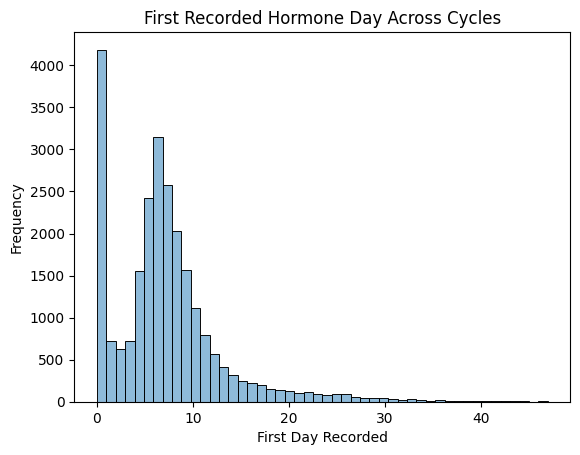

In [43]:
sns.histplot(first_day_numeric, bins=len(lh_columns),legend=False)
plt.xlabel('First Day Recorded')
plt.ylabel('Frequency')
plt.title('First Recorded Hormone Day Across Cycles')
#ax.get_legend().remove()

In [3]:
ages = pd.read_csv('/content/user_dictionary_per_user_cycle (1).csv')

In [6]:
# age plots: throughout cycle length, visually look for on average differences in the 3 hormones using box plot under 40/over 40
ages['age_in_years']=ages['age_in_months']/12

In [ ]:
df.head()

In [ ]:
ages.head()

In [7]:
merged_df = pd.merge(df, ages, on=['hub_id', 'cycle_index'], how='inner')
merged_df.head()

,Unnamed: 0,hub_id,cycle_index,cycle_length,cycle_status,max_LH_day,max_LH_day_bw,day0_LH,day1_LH,day2_LH,...,day41_PDG,day42_PDG,day43_PDG,day44_PDG,day45_PDG,day46_PDG,day47_PDG,date_of_birth,age_in_months,age_in_years
0,0,U2CCD5D16315123,31.0,35,1,21.0,-14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/1991,394,32.833333
1,1,U303F6B17404145,7.0,19,1,5.0,-14.0,7.260,11.30,9.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/1989,398,33.166667
2,2,U2E649816722750,19.0,31,1,15.0,-16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/1982,496,41.333333
3,3,U2F50A717152551,10.0,26,1,20.0,-6.0,3.625,2.13,5.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/1980,496,41.333333
4,4,U2F191017106760,19.0,26,1,15.0,-11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04/1982,483,40.250000


In [8]:
merged_df['age_group'] = merged_df['age_in_years'].apply(lambda x: 'Under 40' if x < 40 else '40 and Over')

In [12]:
# Cap outliers for viz
for col in lh_columns:
    merged_df[col] = merged_df[col].clip(upper=merged_df[col].quantile(0.99))
merged_df['mean_LH'] = merged_df[lh_columns].mean(axis=1)

for col in e3g_columns:
    merged_df[col] = merged_df[col].clip(upper=merged_df[col].quantile(0.99))
merged_df['mean_E3G'] = merged_df[e3g_columns].mean(axis=1)

for col in pdg_columns:
    merged_df[col] = merged_df[col].clip(upper=merged_df[col].quantile(0.99))
merged_df['mean_PDG'] = merged_df[pdg_columns].mean(axis=1)

<ipython-input-12-8eeca672da3c>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df['mean_E3G'] = merged_df[e3g_columns].mean(axis=1)
<ipython-input-12-8eeca672da3c>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df['mean_PDG'] = merged_df[pdg_columns].mean(axis=1)


In [15]:
# melting the average hormone levels into one column for just "mean level"
melted_df = merged_df.melt(id_vars=['age_group'], value_vars=['mean_LH', 'mean_E3G', 'mean_PDG'],
                           var_name='Hormone', value_name='Mean Level')
melted_df['Hormone'] = melted_df['Hormone'].replace({'mean_LH': 'LH', 'mean_E3G': 'E3G', 'mean_PDG': 'PDG'})

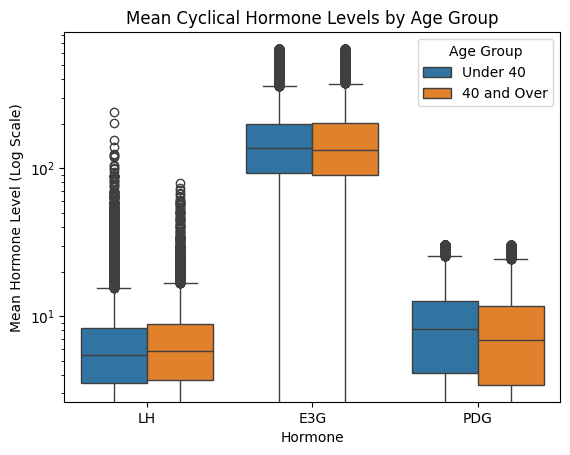

In [18]:
sns.boxplot(x='Hormone', y='Mean Level', hue='age_group', data=melted_df)
plt.yscale('log')
plt.title('Mean Cyclical Hormone Levels by Age Group')
plt.ylabel('Mean Hormone Level (Log Scale)')
plt.xlabel('Hormone')
plt.legend(title='Age Group')
plt.show()

In [23]:
sns.kdeplot(data=melted_df, x='cycle_length', y='Mean Level', hue='age_group', fill=True, common_norm=False)

plt.title('KDE Plot of Hormone Levels by Cycle Length and Age Group')
plt.xlabel('Cycle Length')
plt.ylabel('Mean Hormone Level')
plt.legend(title='Age Group')
plt.show()

ValueError: Could not interpret value `cycle_length` for `x`. An entry with this name does not appear in `data`.

In [20]:
sns.kdeplot(data=melted_df,x='cycle_length',y='Mean Level',hue='Hormone')

ValueError: Could not interpret value `cycle_length` for `x`. An entry with this name does not appear in `data`.